# Part 1: Data Preprocessing

In [112]:
# Import usual suspects
import numpy as np
import pandas as pd

In [113]:
# Importing  the training set
pd_training_set = pd.read_csv('Lottery_NY_Lotto_Winning_Numbers__Beginning_2001_without_bonus.csv', header=None)
pd_training_set.head()

,0,1,2,3,4,5
0,8,13,26,35,45,51
1,1,15,24,31,34,44
2,3,8,29,30,31,49
3,21,25,39,50,54,59
4,15,19,32,38,47,50


In [114]:
# Training Set
# now add each column of six rows into next 6 rows of first column
two_dim_lotto_array_train = []
# take 300 rows less from total for testing and rest use for training
for col in pd_training_set.iloc[:-300,:].values:
#     print (col)
    for row in col:
        two_dim_lotto_array_train.append([row])
#         print (row)

In [115]:
# convert python list into numpy array
training_set_val = np.array(two_dim_lotto_array_train, ndmin=2)

print (type(training_set_val))
print (training_set_val.ndim)
print (training_set_val.shape)
print (training_set_val)

<class 'numpy.ndarray'>
2
(7968, 1)
[[ 8]
 [13]
 [26]
 ..., 
 [29]
 [46]
 [50]]


In [116]:
# Testing Set
# now add each column of six rows into next 6 rows of first column
two_dim_lotto_array_test = []
# take 300 rows less from total for testing and rest use for training
for col in pd_training_set.iloc[-300:,:].values:
#     print (col)
    for row in col:
        two_dim_lotto_array_test.append([row])
#         print (row)

In [117]:
# convert python list into numpy array
testing_set_val = np.array(two_dim_lotto_array_test, ndmin=2)

print (type(testing_set_val))
print (testing_set_val.ndim)
print (testing_set_val.shape)
print (testing_set_val)

<class 'numpy.ndarray'>
2
(1800, 1)
[[ 1]
 [28]
 [38]
 ..., 
 [17]
 [26]
 [55]]


In [118]:
# # NOw let's take only open price of stock
# # if we choose pd_training_set.iloc[:,1].values It will be only 1 dim numpy array
# # however, we need 2 dimension numpy array
# training_set_val = pd_training_set.iloc[:,1:2].values
# print (type(training_set_val))
# print (training_set_val.ndim)
# print (training_set_val.shape)
# print (training_set_val)

In [119]:
# # Now, let's do normalization
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()

# training_set = sc.fit_transform(training_set_val)
# print (training_set)
# print (type(training_set))
# print (training_set.ndim)
# print (training_set.shape)

# # ALSO TRY STANDARDIZATION INSTEAD OF NORMALIZATION

training_set = training_set_val

In [120]:
# Now we are setting X_train and y_train
# X_train is time at 0 value and y_train is time at +1 value
X_train = training_set[0:7967]
print (X_train)

[[ 8]
 [13]
 [26]
 ..., 
 [19]
 [29]
 [46]]


In [121]:
# y_train is time+1 value
y_train = training_set[1:7968]
print (y_train)

[[13]
 [26]
 [35]
 ..., 
 [29]
 [46]
 [50]]


In [122]:
# Now, Reshaping for keras before training, as it requires 3 dimenions

# changing from 2 to 3 dimension array, by addding time step as 3rd dimension
# corresponds to (batch_size, timesteps, input_dim)
X_train = np.reshape(X_train,(7967,1,1))
print (X_train)

[[[ 8]]

 [[13]]

 [[26]]

 ..., 
 [[19]]

 [[29]]

 [[46]]]


# Part 2: Initializing the RNN

In [123]:
# importing the Keras liabraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [124]:
# Create a regressor bassed upon sequential RNN
# classifier = Sequential()
# classifier.add(LSTM(units=10, activation='sigmoid', input_shape=(None, 1)))
# classifier.add(Dense(units=1))
regressor = Sequential()
regressor.add(LSTM(units=10, activation='sigmoid', input_shape=(None, 1)))
regressor.add(Dense(units=1))

In [125]:
# Now, let' compile our RNN regressor
# classifier.compile(optimizer='rmsprop', loss='categorical_crossentropy')
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

In [126]:
regressor.fit(X_train ,y_train, batch_size=32, epochs=200)

Epoch 1/200
7967/7967 [==============================] - 1s - loss: 1129.5908     
Epoch 2/200
7967/7967 [==============================] - 1s - loss: 1031.2356     
Epoch 3/200
7967/7967 [==============================] - 1s - loss: 966.1112     
Epoch 4/200
7967/7967 [==============================] - 1s - loss: 906.0925     
Epoch 5/200
7967/7967 [==============================] - 1s - loss: 843.4392     
Epoch 6/200
7967/7967 [==============================] - 1s - loss: 759.0859     
Epoch 7/200
7967/7967 [==============================] - 1s - loss: 677.8462     
Epoch 8/200
7967/7967 [==============================] - 1s - loss: 609.0655     
Epoch 9/200
7967/7967 [==============================] - 1s - loss: 551.4665     
Epoch 10/200
7967/7967 [==============================] - 1s - loss: 499.8991     
Epoch 11/200
7967/7967 [==============================] - 1s - loss: 453.5067     
Epoch 12/200
7967/7967 [==============================] - 1s - loss: 412.6569     
Epoch 13/20

7967/7967 [==============================] - 1s - loss: 228.3767     
Epoch 100/200
7967/7967 [==============================] - 1s - loss: 228.3571     
Epoch 101/200
7967/7967 [==============================] - 1s - loss: 228.3532     
Epoch 102/200
7967/7967 [==============================] - 1s - loss: 228.3959     
Epoch 103/200
7967/7967 [==============================] - 1s - loss: 228.3563     
Epoch 104/200
7967/7967 [==============================] - 1s - loss: 228.3820     
Epoch 105/200
7967/7967 [==============================] - 1s - loss: 228.3606     
Epoch 106/200
7967/7967 [==============================] - 1s - loss: 228.3648     
Epoch 107/200
7967/7967 [==============================] - 1s - loss: 228.3786     
Epoch 108/200
7967/7967 [==============================] - 1s - loss: 228.3701     
Epoch 109/200
7967/7967 [==============================] - 1s - loss: 228.3616     
Epoch 110/200
7967/7967 [==============================] - 1s - loss: 228.3734     
Epoch 

7967/7967 [==============================] - 2s - loss: 228.3733     
Epoch 197/200
7967/7967 [==============================] - 2s - loss: 228.3417     
Epoch 198/200
7967/7967 [==============================] - 2s - loss: 228.3294     
Epoch 199/200
7967/7967 [==============================] - 2s - loss: 228.3646     
Epoch 200/200
7967/7967 [==============================] - 2s - loss: 228.3312     


# Part 3: Making Prediction

In [64]:
# # Preprocessing for Test_set
# # Importing the test set
# pd_testing_set = pd.read_csv('Google_Stock_Price_Test.csv')
# pd_testing_set.tail()

In [127]:
# NOw let's take only open price of stock
# if we choose pd_training_set.iloc[:,1] It will be only 1 dim pandas series
# however, we need 2 dimension, so
real_lotto_numbers = testing_set_val
print (type(real_lotto_numbers))
print (real_lotto_numbers.ndim)
print (real_lotto_numbers.shape)
print (real_lotto_numbers)

<class 'numpy.ndarray'>
2
(1800, 1)
[[ 1]
 [28]
 [38]
 ..., 
 [17]
 [26]
 [55]]


In [128]:
# X_test = sc.fit_transform(real_lotto_numbers)
# print (type(X_test))
# print (X_test.ndim)
# print (X_test.shape)
# print (X_test)
# # in the end inverse fit transform to get normal stock open price back
X_test = real_lotto_numbers

In [129]:
# # same for X_test
# X_test = testing_set[0:20]
# print (X_test)
# print (type(X_test))
# print (X_test.ndim)
# print (X_test.shape)
# print (X_test)

In [130]:
# Reshaping

# chaging from 2 to 3 dimension array, by addding time step as 3rd dimension
# corresponds to (batch_size, timesteps, input_dim)
test_inputs = np.reshape(X_test,(1800,1,1))
print (type(test_inputs))
print (test_inputs.ndim)
print (test_inputs.shape)
print (test_inputs)

<class 'numpy.ndarray'>
3
(1800, 1, 1)
[[[ 1]]

 [[28]]

 [[38]]

 ..., 
 [[17]]

 [[26]]

 [[55]]]


In [131]:
# Now, let's predict
y_test = regressor.predict(test_inputs)

In [141]:
# inverse scaled values to get real stock price
# predicted_lotto_numbers = np.around(sc.inverse_transform(y_test))
print (y_test)
predicted_lotto_numbers = np.round(y_test,0)
print (predicted_lotto_numbers)
print (real_lotto_numbers)

true_predictions = predicted_lotto_numbers == real_lotto_numbers
print (np.sum(true_predictions))
print (np.sum(true_predictions)/np.size(true_predictions))

[[ 10.74979305]
 [ 35.32204437]
 [ 35.32256699]
 ..., 
 [ 26.67741966]
 [ 35.32151031]
 [ 35.32258606]]
[[ 11.]
 [ 35.]
 [ 35.]
 ..., 
 [ 27.]
 [ 35.]
 [ 35.]]
[[ 1]
 [28]
 [38]
 ..., 
 [17]
 [26]
 [55]]
31
0.0172222222222


In [138]:
# Part 4: Let's Visualize the results

import matplotlib.pyplot as plt
%matplotlib inline

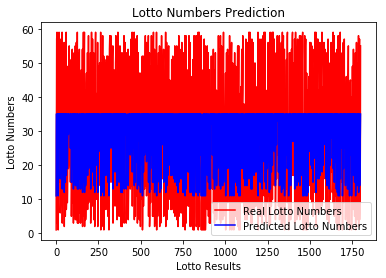

In [139]:
plt.plot(real_lotto_numbers, color='red', label = 'Real Lotto Numbers')
plt.plot(predicted_lotto_numbers, color='blue', label = 'Predicted Lotto Numbers')
plt.title('Lotto Numbers Prediction')
plt.xlabel('Lotto Results')
plt.ylabel('Lotto Numbers')
plt.legend()
plt.show()

In [32]:
real_stock_price_df = pd.DataFrame(real_stock_price)
print (type(real_stock_price_df))
real_stock_price_df.head()

<class 'pandas.core.frame.DataFrame'>


,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [31]:
predicted_stock_df = pd.DataFrame(predicted_stock_price, columns=['Predicted_Open'])
print (type(predicted_stock_df))
predicted_stock_df.head()

<class 'pandas.core.frame.DataFrame'>


,Predicted_Open
0,779.161133
1,788.316895
2,786.100220
3,795.131042
4,806.383484


In [41]:
print (pd_testing_set.iloc[:,1])

0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
20    799.68
Name: Open, dtype: float64


In [42]:
comparsion_sheet = pd.DataFrame([pd_testing_set.iloc[:,1].values,predicted_stock_price], columns=['Real_Open_Price','Predicted_Open_Price'])
comparsion_sheet.head()

AssertionError: 2 columns passed, passed data had 21 columns